In [23]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
import myUtils as utils

%load_ext autoreload
%autoreload 2

rootPath = "../../results/scenario/biomass"
pathTail = "/networks/base_s_27_3H_3H_2045.nc"



plt.style.use('bmh')
%matplotlib inline

nBase = pypsa.Network(f"../../results/scenario/base{pathTail}")
nMean = pypsa.Network(f"{rootPath}_mean/{pathTail}")
nGood = pypsa.Network(f"{rootPath}_good/{pathTail}")
nBest = pypsa.Network(f"{rootPath}_best/{pathTail}")

networks = {
  # "Basis": nBase,
  "Mittel": nMean,
  "Optimistisch": nGood,
  "Sehr Optimistisch": nBest
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


  [Biomasseproduktion], [136,81], [175,23], [173,17], [170,66],
  [Biomasse CHP], [-0,00], [-9,59], [-0,00], [-0,00],
  [Biomasse für die Industrie], [-136,81], [-136,81], [-136,81], [-136,81],
  [Biomasse-Heizung im ländlichen Raum], [-0,00], [-3,11], [-6,37], [-7,17],
  [Biomasse-Heizung in der Stadt], [-0,00], [-25,72], [-29,99], [-26,68],


Text(0, 0.5, 'Energie in Gigawattstunde')

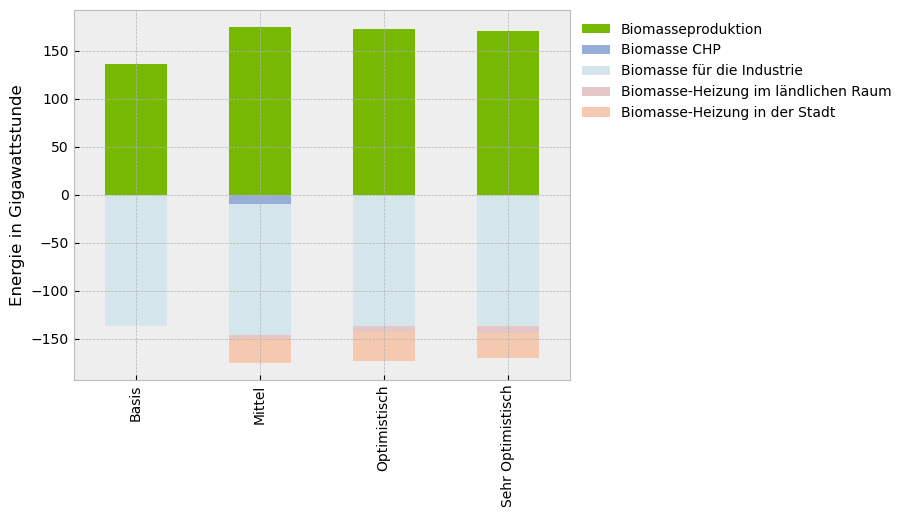

In [9]:
import pandas as pd
import myUtils as utils
import importlib
importlib.reload(utils)

import seaborn as sns
# plt.style.use('seaborn-v0_8-whitegrid')
sns.color_palette("muted")

df = pd.DataFrame()
for key, n in networks.items():
  s = pd.Series()
  biomass = utils.getNTimePropByGroup(n, 'Generator', 'p', utils.de_solid_biomass).sum().sum() * 3 

  biomassCHP = utils.getNTimePropByGroup(n, 'Link','p0', utils.de_solid_biomass_chp).sum().sum() * 3 
  biomassIndustry = utils.getNTimePropByGroup(n, 'Link','p0', utils.de_solid_biomass_industry).sum().sum() * 3 
  biomassRuralBoiler = utils.getNTimePropByGroup(n, 'Link','p0', utils.de_rural_biomass_boiler).sum().sum() * 3 
  biomassUrbanBoiler = utils.getNTimePropByGroup(n, 'Link','p0', utils.de_urban_decentral_biomass_boiler).sum().sum() * 3 



  s['Biomasseproduktion'] = biomass
  

  s['Biomasse CHP'] =  - biomassCHP
  s['Biomasse für die Industrie'] = - biomassIndustry
  s['Biomasse-Heizung im ländlichen Raum'] = - biomassRuralBoiler
  s['Biomasse-Heizung in der Stadt'] = - biomassUrbanBoiler
  # s['Methanolisierung'] =   - (h2Electrolysis + h2Import + h2SMR + h2Dispatch + h2Industry + h2Export + h2FT )
  
  
  # # df = df.set_index('Tech')
  df[key] = s

# df.insert(0, 'unit', ['GW_LHV', 'TWH_LHV', 'TWH_LHV', 'TWH_LHV', 'TWH_LHV', 'TWH_LHV', 'TWH_LHV' ])
df = df / 1e6
print(utils.dataframe_to_table(df))

colors = {
  'Biomasseproduktion': '#76B802',
  

  'Biomasse CHP': '#97AED9',
  'Biomasse für die Industrie': '#D5E5EC',
  'Biomasse-Heizung im ländlichen Raum': '#E5C6C6',
  'Biomasse-Heizung in der Stadt': '#F4C9B0',
}


ax = df.T.plot(kind='bar', stacked=True, color=colors)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, frameon=False)
# ax.set_xlabel('')
ax.set_ylabel('Energie in Gigawattstunde')



# plt.show()

In [55]:
from pea import Pea, carriers as cs


df = pd.DataFrame()
for key, n in networks.items():
  pea = Pea(n, config={'resolution': 3})
  s = pd.Series()
  s['Biomasse CHP CAPEX'] = pea.get(cs.biomassCHP).capex() / 1e6
  s['Biomassekessel CAPEX'] = pea.get(cs.biomassBoiler).capex() / 1e6

  s['Biomasse CHP Kapazität'] = pea.get(cs.biomassCHP).p_nom_opt() / 1e3
  s['biomassBoilerk Kapazität'] = pea.get(cs.biomassBoiler).p_nom_opt() / 1e3


  s['Biomasse CHP Energie'] =   pea.get(cs.biomassCHP).energy('p1') / 1e6
  s['biomassBoilerk Energie'] =   pea.get(cs.biomassBoiler).energy('p1') / 1e6


  df[key] = s

print(df)

print(utils.dataframe_to_table(df))

                           Mittel  Optimistisch  Sehr Optimistisch
Biomasse CHP CAPEX        2.75276       2.75276            2.75276
Biomassekessel CAPEX      1.66674       1.38390            0.83442
Biomasse CHP Kapazität    4.41251       0.00014            0.00004
biomassBoilerk Kapazität 22.77246      60.03417           73.66450
Biomasse CHP Energie      2.55433       0.00007            0.00002
biomassBoilerk Energie   25.22899      33.80892           31.48238
  [Biomasse CHP CAPEX], [2,75], [2,75], [2,75],
  [Biomassekessel CAPEX], [1,67], [1,38], [0,83],
  [Biomasse CHP Kapazität], [4,41], [0,00], [0,00],
  [biomassBoilerk Kapazität], [22,77], [60,03], [73,66],
  [Biomasse CHP Energie], [2,55], [0,00], [0,00],
  [biomassBoilerk Energie], [25,23], [33,81], [31,48],
